In [1]:
import pandas as pd
import numpy as np

from Modified_calplot import yearplot_Cal
from Modified_calplot import plotCal

In [1]:
# source En: "https://www.smard.de/en/downloadcenter/download-market-data/"
# Calplot code: https://calplot.readthedocs.io/en/latest/_modules/calplot/calplot.html#calplot
# Carbon intensity used for sorting: "https://sustainabletravel.org/wp-content/uploads/Carbon-Intensity-of-Electricity-Generation-Graph.png"

In [3]:
df_de = pd.read_excel("./Actual_generation_202301010000_202312312359_Quarterhour.xlsx", skiprows=9)
df_de.head(3)

/home/amin/apps/miniconda3/envs/dev/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,"Jan 1, 2023",12:00 AM,12:15 AM,1094.25,320,684.25,7145.75,0,32.25,615.25,962.75,517,429.75,13.5,307.25
1,"Jan 1, 2023",12:15 AM,12:30 AM,1091.25,317.5,743.5,7158.25,0,32.25,614.75,963.25,518,429.5,9.75,307.25
2,"Jan 1, 2023",12:30 AM,12:45 AM,1090.25,317.25,817,7302.25,0,32.5,615,966.5,517,432,9.75,308.25


In [4]:
df = df_de.copy()

In [6]:
dic_keys = df.columns.tolist()
dic_values = [ "Date", "Start", "Finish", "Biomass_MWh", "HydroPower_MWh", "WindOffshore_MWh", "WindOnshore_MWh", "Solar_MWh",
    "OtherRenewables_MWh", "NuclearEnergy_MWh", "LigniteCoal_MWh", "HardCoal_MWh", "NaturalGas_MWh", "PumpedStorage_MWh", "OtherConventional_MWh",]
german_to_english_column_names = dict(zip(dic_keys, dic_values))

In [7]:
df.rename(columns={
 'Biomass [MWh]': 'Biomass_MWh',
 'Hydropower [MWh]': 'HydroPower_MWh',
 'Wind offshore [MWh]': 'WindOffshore_MWh',
 'Wind onshore [MWh]': 'WindOnshore_MWh',
 'Photovoltaics [MWh]': 'Solar_MWh',
 'Other renewable [MWh]': 'OtherRenewables_MWh',
 'Nuclear [MWh]': 'NuclearEnergy_MWh',
 'Lignite [MWh]': 'LigniteCoal_MWh',
 'Hard coal [MWh]': 'HardCoal_MWh',
 'Fossil gas [MWh]': 'NaturalGas_MWh',
 'Hydro pumped storage [MWh]': 'PumpedStorage_MWh',
 'Other conventional [MWh]': 'OtherConventional_MWh'
}, inplace=True)

In [8]:
powergeneration_vector_list = [
    'Biomass_MWh',
    'HydroPower_MWh',
    'WindOffshore_MWh',
    'WindOnshore_MWh',
    'Solar_MWh',
    'OtherRenewables_MWh',
    'NuclearEnergy_MWh',
    'LigniteCoal_MWh',
    'HardCoal_MWh',
    'NaturalGas_MWh',
    'PumpedStorage_MWh',
    'OtherConventional_MWh']

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop=True, inplace=True)

In [10]:
df = df.replace("-", 0).copy() #replacing hyphene values with zero 

In [11]:
for col in powergeneration_vector_list:
    df[col] = pd.to_numeric(df[col])

In [12]:
df_daily = df.groupby(level="Date").sum()[powergeneration_vector_list].copy()
df_daily.head(3)

,Biomass_MWh,HydroPower_MWh,WindOffshore_MWh,WindOnshore_MWh,Solar_MWh,OtherRenewables_MWh,NuclearEnergy_MWh,LigniteCoal_MWh,HardCoal_MWh,NaturalGas_MWh,PumpedStorage_MWh,OtherConventional_MWh
Date,,,,,,,,,,,,
2023-01-01,108038.50,29786.75,108998.25,559733.75,44197.25,3077.0,59036.50,97752.00,49896.5,38077.75,20185.75,29318.75
2023-01-02,110865.25,29937.25,85465.25,579572.25,34262.25,3224.5,59035.75,256484.25,76830.5,54631.25,29632.50,30752.75
2023-01-03,112658.25,31648.25,101895.50,326506.00,44933.50,3637.0,59058.00,316322.00,159465.0,78289.75,48884.25,31248.25


In [13]:
powergeneration_vector_list_port_total = []
for col in powergeneration_vector_list[:]:
    # print(col)
    new_col = col.replace("_MWh", "")
    df_daily[new_col] = df_daily[col] / df_daily.sum(axis=1)
    powergeneration_vector_list_port_total.append(new_col)

In [14]:
powergeneration_vector_list_port_total_sorted = [
 'HydroPower',
 'WindOffshore',
 'WindOnshore',
 'NuclearEnergy',
 'Biomass',
 'Solar',
 'OtherRenewables',
 'NaturalGas', 
 'HardCoal',
 'LigniteCoal',
 'OtherConventional',
  'PumpedStorage',
  ]

In [28]:
# df_daily[df_daily.index.to_series().dt.isocalendar().week == 32][powergeneration_vector_list_port_total_sorted].sum(axis=1) # testing to show values summed up to 1

HydroPower
WindOffshore
WindOnshore
NuclearEnergy
Biomass
Solar
OtherRenewables
NaturalGas
HardCoal
LigniteCoal
OtherConventional
PumpedStorage


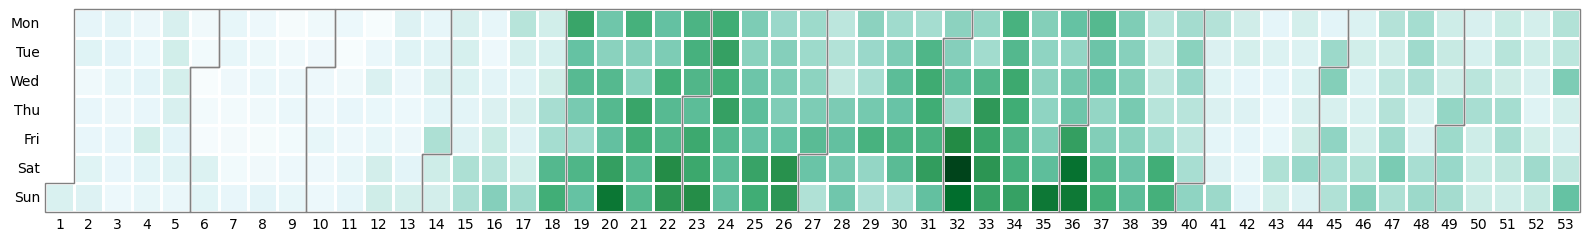

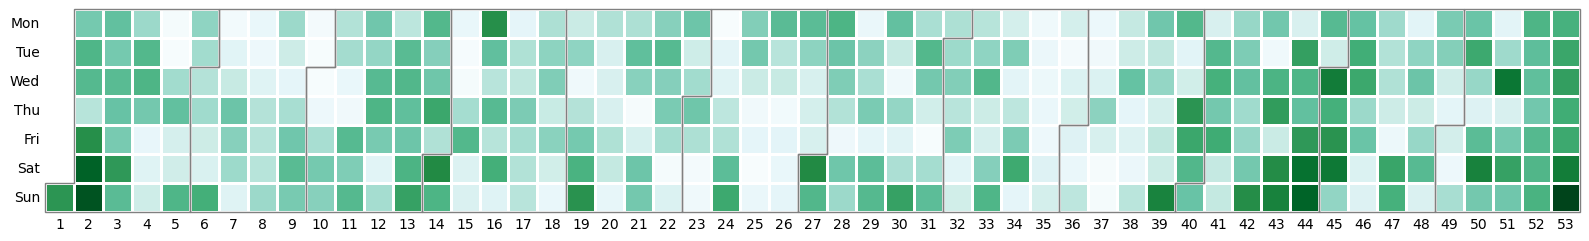

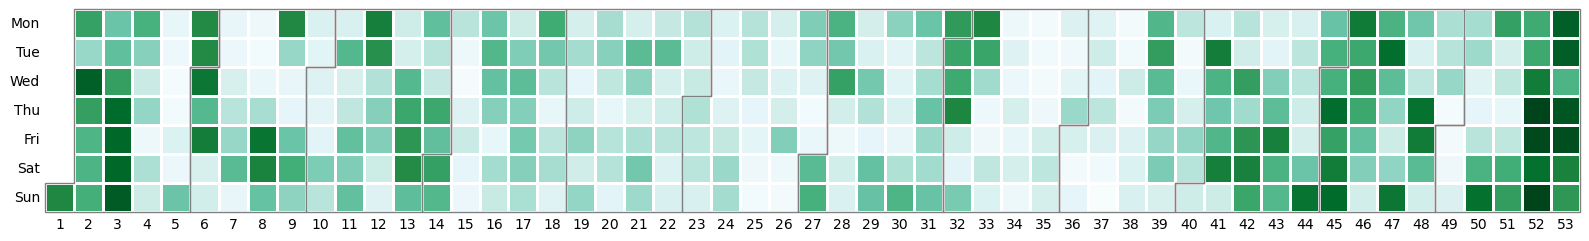

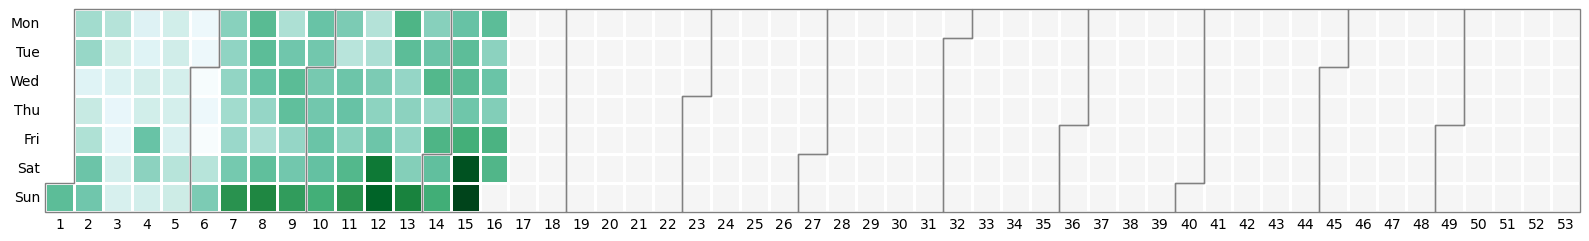

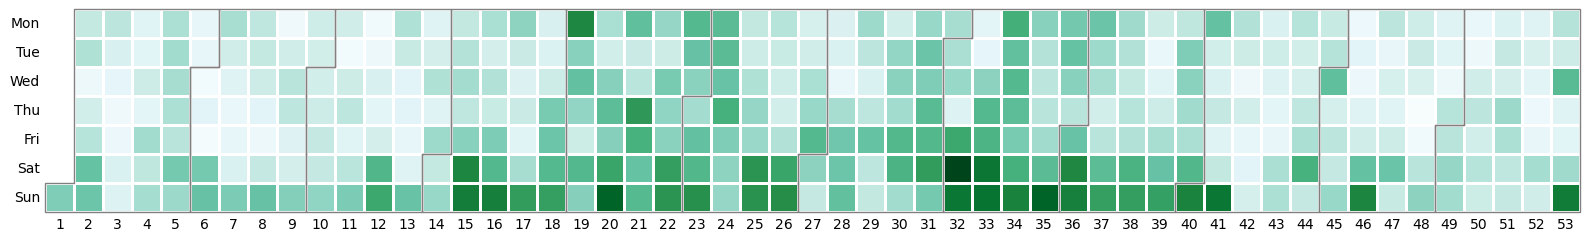

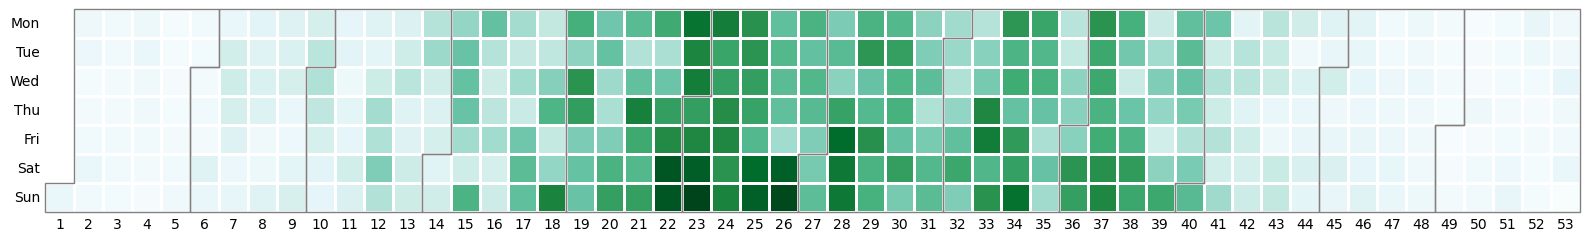

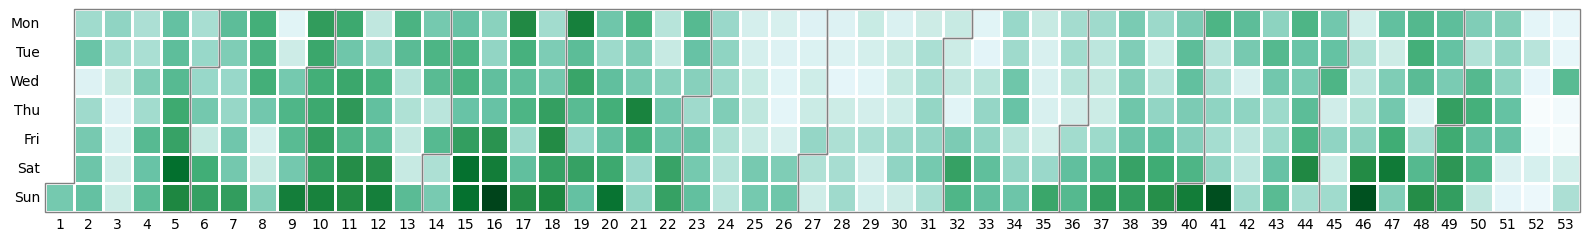

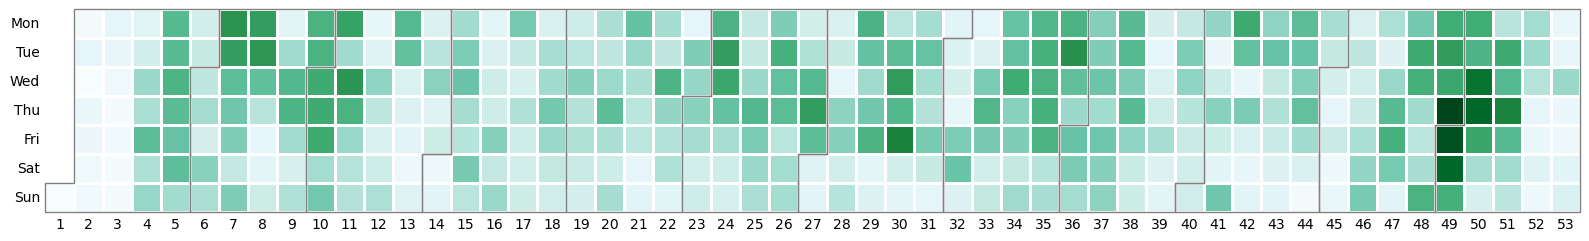

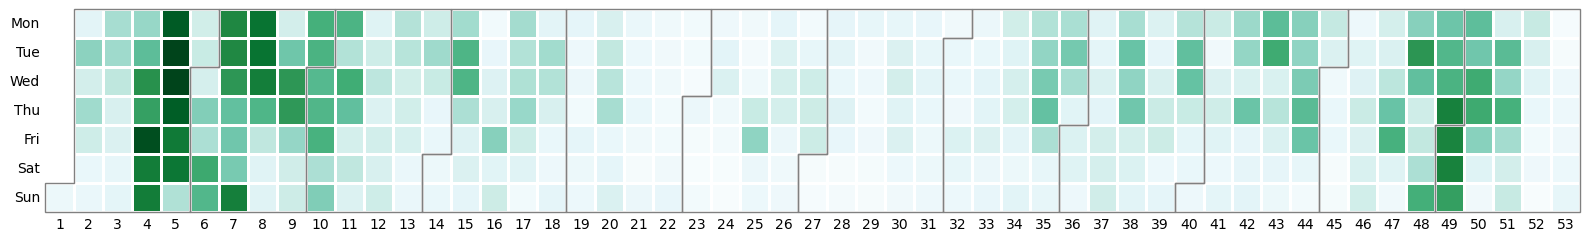

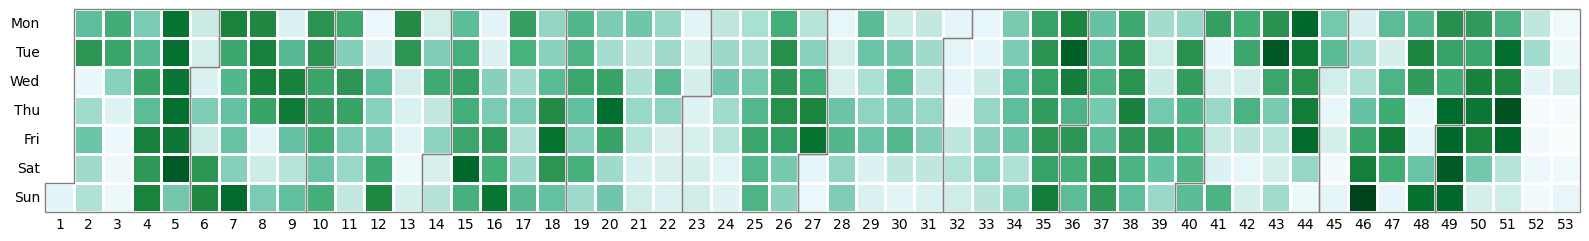

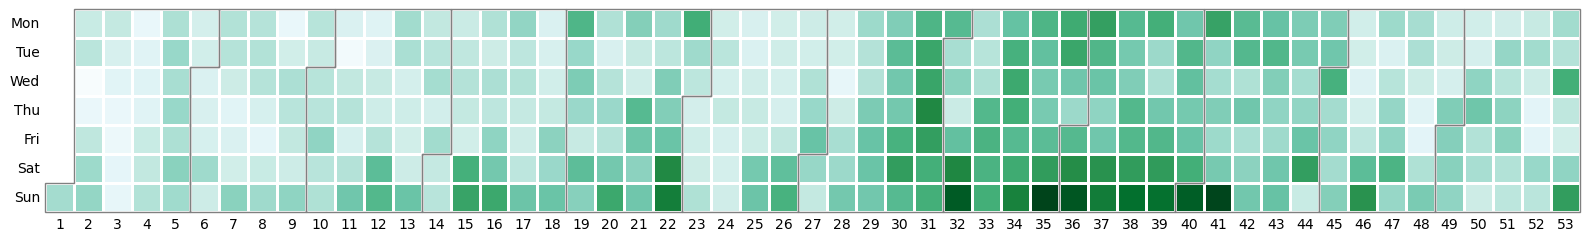

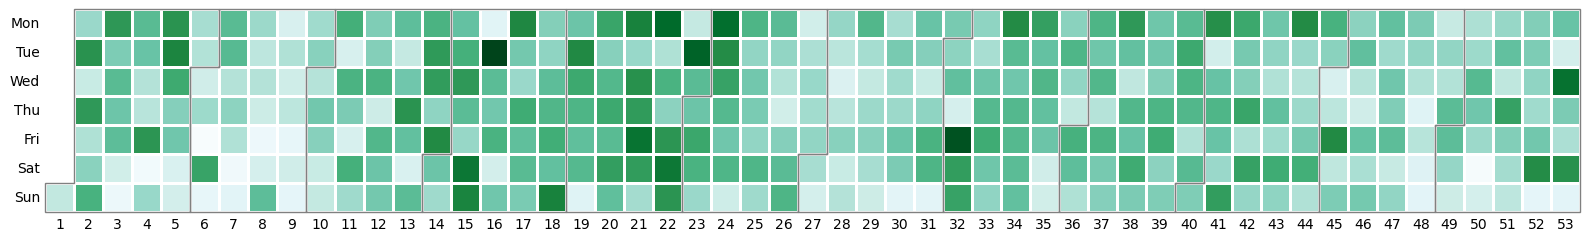

In [16]:
for col in powergeneration_vector_list_port_total_sorted[:]:
    print(col)
    plotCal(df_daily[col], 
                    figsize=(16,10), 
                    yearlabels=False,
                    colorbar=False,
                    )